In [1]:
from traitlets.config.manager import BaseJSONConfigManager
# To make this work, replace path with your own:
# On the command line, type juypter --paths to see where your nbconfig is stored
# Should be in the environment in which you install reveal.js
path = r"C:\Users\Pierr\.jupyter"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
    })

{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'zoom'}

In [2]:
%%HTML 
<link rel="stylesheet" type="text/css" href="custom.css">

# CME 193 
## Introduction to Scientific Python
## Winter 2018

<br>

## Lecture 6
-------------
## Pandas

# Lecture 6 Contents

* Administration
* Pandas
    - Series:
    - DataFrames:
        - Creation
        - Indexing/Selection
        - Essential & Basic Functionality
    - Import Export
    - Concatenating Dataframes
    - Function Applications / Grouping
    - Plotting
    - Interactive example
* Exercises

---

## Remaining Schedule


| Date | |Description |
| ------:| -----------:|
| Jan 30th || ```Lecture``` ```6```: Pandas + interactive example|
| Feb 1 || ```Lecture``` ```7```: Machine learning & optimization |
| Feb 6  || ```Lecture``` ```8```: Poll (More Packages for ML Deep Learning or Multithreading) |
||||
| Feb 20th || Exercises and HW2/Project due |

# HW1 

Awesome work. You should expect your grade to be the same grade that the graders returned if your ran locally.
I will post these to Canvas shortly.

# HW2 

Posted on the course website https://web.stanford.edu/~jacobp2/src/html/homework.html

# Project

### You have the option to complete a project in place of HW2

Posted on the course website https://web.stanford.edu/~jacobp2/src/html/project.html

#### Project Proposal due:  ``` Friday Feb 2th```
#### Final deliverables due: ``` Feb 20th``` 

## Remaining Schedule

### Office Hours

- I will continue to hold office hours for the class time until the project is due
- Please do email me along the way with any Project/HW questions you might have.

### Any questions?

# Pandas

## What is Pandas?
- Introduced in 2011, Pandas is a Python package providing high-performance, easy-to-use data structures and data analysis tools
- Motivated by R, pandas came out of the Finance industry. Now a key component to SciPy.
- Provides fast, flexible, and expressive data structures designed to make working with relational or labeled data both easy and intuitive

# Let's do a showcase

## Pandas
- Designed for working with tabular or structured data (like R dataframe, SQL table, Excel spreadsheet, ...):
- Import, clean and serialize data for storage
- Conduct exploratory analysis (along with Jupyter + matplotlib + ...)
- Model your data (together with scikit-learn, statsmodels, ...)

## Pandas
- Pandas is like NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
- Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

## Key features
- File I/O - integrations with multiple file formats
- Working with missing data (.dropna(), pd.isnull())
- Normal table operations: merging and joining, groupby functionality, reshaping via stack, and pivot_tables,
- Time series-specific functionality: 
 - date range generation and frequency conversion, moving window statistics/regressions, date shifting and lagging, etc.
- Built in Matplotlib integration

## Other strengths
- Strong community, support, and documentation
- Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

# Pandas for Data Analysis

- R is a language dedicated to statistics. Python is a general-purpose language
with statistics modules. 
- R has more statistical analysis features than Python,
and specialized syntaxes. 

However, when it comes to building complex analysis
pipelines that mix statistics with e.g. image analysis, text mining, or control
of a physical experiment, the richness of Python is an invaluable asset.

## Pandas Documentation

Check out the documentation here:

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

(This tutorial is derived mainly from pandas doc)

In [3]:
import pandas as pd
import numpy as np

## Object Basics & Creation

| Name | Dimensions | Description  |
| ------:| -----------:|
| ```pd.Series``` | 1 | 1D labeled homogeneously-typed array |
| ```pd.DataFrame```  | 2| General 2D labeled, size-mutable tabular structure |
| ```pd.Panel``` | 3|  General 3D labeled, also size-mutable array |


# Series
## What are they?
- Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.
- Basic method to create a series: 
```python 
s = pd.Series(data, index = index) ```
- Data Can be many things:
    * A Python Dictionary
    * An ndarray (or reg. list)
    * A scalar 
- The passed index is a list of axis labels (which varies on what data is)

# Series Creation From ndarray 

- Index must be of same length as data. If no index is passed, it will automatically be [0, ..., len(data) - 1]

In [7]:
first_series = pd.Series([1,2,4,8,16,32,64])
print(type(first_series))
print(first_series)

<class 'pandas.core.series.Series'>
0     1
1     2
2     4
3     8
4    16
5    32
6    64
dtype: int64


In [166]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('-'*50)
print(s.index)

a    0.142777
b    0.529805
c   -0.786419
d    0.979670
e    0.025925
dtype: float64
--------------------------------------------------
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


# Series Creation if data is a dict
- If Data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out, otherwise an index will be constructed from the sorted keys of the dict

In [13]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [10]:
pd.Series(d, index = ['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

# Series Creation if data is a scalar

- Index must be provided. The value will be repeated to match the length of the index

In [11]:
pd.Series(5, index = ['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

## Series Intro
- Series acts similar to a numpy array, and is valid arguments to most numpy functions. 
- Slicing also slices the index
- Short Intro, back to this later

In [14]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)

a   -0.744829
b    0.590687
c   -0.180409
d   -0.665866
e   -0.746612
dtype: float64


In [15]:
end_string = '\n' + '-'*50 + '\n'
print(s[0], end = end_string)
print(s[:3], end =end_string)
print(s[ s > s.mean()], end = end_string)
print(np.exp(s), end = end_string)

-0.74482909626
--------------------------------------------------
a   -0.744829
b    0.590687
c   -0.180409
dtype: float64
--------------------------------------------------
b    0.590687
c   -0.180409
dtype: float64
--------------------------------------------------
a    0.474815
b    1.805228
c    0.834929
d    0.513828
e    0.473970
dtype: float64
--------------------------------------------------


## Series is also dict like
- A Series is like a fixed-size dict in that you can get and set values by index label

In [16]:
print(s, end = end_string)
print(s['a'], end = end_string)

a   -0.744829
b    0.590687
c   -0.180409
d   -0.665866
e   -0.746612
dtype: float64
--------------------------------------------------
-0.74482909626
--------------------------------------------------


In [17]:
s['e'] = 12
print(s, end = end_string)
print('e' in s, end = end_string)
print(s.get('f', None), end = end_string)
print(s.get('e', None), end = end_string)

a    -0.744829
b     0.590687
c    -0.180409
d    -0.665866
e    12.000000
dtype: float64
--------------------------------------------------
True
--------------------------------------------------
None
--------------------------------------------------
12.0
--------------------------------------------------


### Series Attributes 

- Get the index : 
```python 
s.index ``` 
- Get the values :
``` python 
s.values ``` 
- Find the shape : 
``` python 
s.shape ``` 

In [20]:
print(s.index, end = end_string)
print(s.values, end = end_string)
print(s.shape)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
--------------------------------------------------
[ -0.7448291    0.59068716  -0.18040879  -0.66586633  12.        ]
--------------------------------------------------
(5,)


# Series iteration

In [21]:
for idx,val in s.iteritems():
    print(idx,val, end = end_string)

a -0.74482909626
--------------------------------------------------
b 0.590687163549
--------------------------------------------------
c -0.180408788769
--------------------------------------------------
d -0.665866329364
--------------------------------------------------
e 12.0
--------------------------------------------------


# Sorting 
- by index  
``` python
Series.sort_index() ``` 
- by values 
``` python
Series.sort_values() ``` 

In [23]:
print(s.sort_index(), end = end_string)
print(s.sort_values(), end = end_string)

a    -0.744829
b     0.590687
c    -0.180409
d    -0.665866
e    12.000000
dtype: float64
--------------------------------------------------
a    -0.744829
d    -0.665866
c    -0.180409
b     0.590687
e    12.000000
dtype: float64
--------------------------------------------------


# Value Counts 
- Find unique elemnts and count occurence ``` python
Series.value_counts() ```

In [24]:
s = pd.Series([0,0,0,1,1,1,2,2,2,2])
print(s.value_counts())

2    4
1    3
0    3
dtype: int64


## Many more...

#### Pretty much anything you can do with a numpy array 
- Series.mean()
- Series.median()
- Series.mode()
- Series.nsmallest(num)
- Series.max ...

In [25]:
print(s.min(),end = end_string)
print(s.max(), end = end_string)

0
--------------------------------------------------
2
--------------------------------------------------


# DataFrame
- DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.
- You can create a series from:
    - Dict of 1D ndarrays, lists, dicts, or Series
    - 2-D numpy array
    - A list of dictionaries
    - A Series
    - Another Dataframe
``` python
df = pd.DataFrame(data, index = index, columns = columns)
```
- ```index```/ ``` columns ``` is a list of the row/ column labels. If you pass an index and/ or columns, you are guarenteeing the index and /or column of the df. 
- If you do not pass anything in, the input will be constructed by "common sense" rules

#### [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

# DataFrame Creation From dict of Series or dicts
- The index of the resulting DataFrame will be the union of the indexes of the various Series. If there are any nested dicts, these will be first converted to Series. 
- If no columns are passed, the columns will be the sorted list of dict keys.

In [27]:
# Create a dictionary of series
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(list(range(4)), index = ['a','b', 'c', 'd'])}
# Columns are dictionary keys, indices and values obtained from series
df = pd.DataFrame(d)
# Notice how it fills the column one with NaN for d
print(df)

   one  two
a  1.0    0
b  2.0    1
c  3.0    2
d  NaN    3


In [28]:
print(pd.DataFrame(d, index = ['d', 'b', 'a']), end = end_string)
print(pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three']),
      end = end_string)

   one  two
d  NaN    3
b  2.0    1
a  1.0    0
--------------------------------------------------
   two three
d    3   NaN
b    1   NaN
a    0   NaN
--------------------------------------------------


In [29]:
# Accessing attributes
print(df.index, end = end_string)
print(df.columns,end = end_string)
print(df.shape)

Index(['a', 'b', 'c', 'd'], dtype='object')
--------------------------------------------------
Index(['one', 'two'], dtype='object')
--------------------------------------------------
(4, 2)


# From dict of ndarray / lists
- The ndarrays must all be the same length. 
- If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [30]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


# From a list of dicts


In [34]:
data = []
for i in range(100):
    data.append({'Column' + str(j):np.random.randint(100) for j in range(5)})
    
print(data[0:10])

[{'Column0': 39, 'Column1': 36, 'Column2': 22, 'Column3': 48, 'Column4': 76}, {'Column0': 77, 'Column1': 90, 'Column2': 46, 'Column3': 70, 'Column4': 21}, {'Column0': 19, 'Column1': 63, 'Column2': 52, 'Column3': 34, 'Column4': 30}, {'Column0': 77, 'Column1': 81, 'Column2': 14, 'Column3': 67, 'Column4': 53}, {'Column0': 67, 'Column1': 4, 'Column2': 62, 'Column3': 49, 'Column4': 34}, {'Column0': 46, 'Column1': 34, 'Column2': 87, 'Column3': 62, 'Column4': 94}, {'Column0': 69, 'Column1': 49, 'Column2': 77, 'Column3': 3, 'Column4': 19}, {'Column0': 13, 'Column1': 73, 'Column2': 61, 'Column3': 16, 'Column4': 82}, {'Column0': 83, 'Column1': 75, 'Column2': 84, 'Column3': 84, 'Column4': 46}, {'Column0': 30, 'Column1': 76, 'Column2': 88, 'Column3': 35, 'Column4': 68}]


In [36]:
df = pd.DataFrame(data)
print(df.head(), end = end_string)
df = pd.DataFrame(data, columns = ['Column0', 'Column1'])
print(df.head(), end = end_string)

   Column0  Column1  Column2  Column3  Column4
0       39       36       22       48       76
1       77       90       46       70       21
2       19       63       52       34       30
3       77       81       14       67       53
4       67        4       62       49       34
--------------------------------------------------
   Column0  Column1
0       39       36
1       77       90
2       19       63
3       77       81
4       67        4
--------------------------------------------------


## Attributes

- ``` df.index ``` : the row index of df
- ``` df.columns ``` : the columns of df
- ``` df.shape ``` : the shape of the df
- ``` df.values ``` : numpy array of values

# Column Selection, Addition and Deletion
- You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations

In [54]:
# Adding and accessing columns 
d = {'one': pd.Series([1,2,3], index  = ['a', 'b', 'c']), 
     'two': pd.Series(range(4), index = ['a','b', 'c', 'd'])}
df = pd.DataFrame(d)
# multiply 
df['three'] =  df['one']*df['two']
# Create a boolean flag
df['flag'] = df['one'] > 2
print(df['one'], end = end_string)
print(df.head())

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64
--------------------------------------------------
   one  two  three   flag
a  1.0    0    0.0  False
b  2.0    1    2.0  False
c  3.0    2    6.0   True
d  NaN    3    NaN  False


In [59]:
# inserting column in specified location
df.insert(1, 'bar', df['one'][:2])
print(df.head())

   one  bar  two  three   flag
a  1.0  1.0    0    0.0  False
b  2.0  2.0    1    2.0  False
c  3.0  NaN    2    6.0   True
d  NaN  NaN    3    NaN  False


In [47]:
# Deleting Columns  
three = df.pop('three')
print(df.head(), end = end_string)
# Propation of values
df['foo'] = 'bar'
print(df, end = end_string)

   one  two   flag
a  1.0    0  False
b  2.0    1  False
c  3.0    2   True
d  NaN    3  False
--------------------------------------------------
   one  two   flag  foo
a  1.0    0  False  bar
b  2.0    1  False  bar
c  3.0    2   True  bar
d  NaN    3  False  bar
--------------------------------------------------


## Indexing and Selection 

- 4 methods ``` [], ix, iloc, loc ```

| Operation  | Syntax       | Result | 
|----|----------------------| ---------------------------|
| Select Column | df[col]   |    Series                      |
| Select Row by Label | df.loc[label] | Series  |
| Select Row by Integer Location | df.iloc[idx] |      Series                    |
| Slice rows | df[5:10]        |                        DataFrame  | 
| Select rows by boolean | df[mask]   | DataFrame        |

- Note all the operations below are valid on series as well restricted to one dimension

## Simplest form Of Indexing: []
- Series: selecting a label: s[label] 
- DataFrame: selection single or multiple columns: 
``` python 
df['col'] or df[['col1', 'col2']] ``` 
- DataFrame: slicing the rows:
``` python
df['rowlabel1': 'rowlabel2'] ``` 
or 
``` python 
df[boolean_mask] ``` 

In [60]:
# Lets create a data frame
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C','D'])
print(df.head())

                   A         B         C         D
2000-01-01 -1.402901 -1.900745  1.578957  0.038846
2000-01-02 -1.533514  0.155058  1.627362  1.067503
2000-01-03 -0.590642 -2.107968  0.035475 -0.589049
2000-01-04 -1.646507  0.669128  1.000945  0.983024
2000-01-05  1.133969  1.692079 -0.195059  1.687823


In [61]:
# column  'A
print(df['A'], end = end_string)
# multiple column 
print(df[['A', 'B']], end = end_string)

2000-01-01   -1.402901
2000-01-02   -1.533514
2000-01-03   -0.590642
2000-01-04   -1.646507
2000-01-05    1.133969
2000-01-06   -0.762547
2000-01-07   -0.829040
2000-01-08    0.833207
Freq: D, Name: A, dtype: float64
--------------------------------------------------
                   A         B
2000-01-01 -1.402901 -1.900745
2000-01-02 -1.533514  0.155058
2000-01-03 -0.590642 -2.107968
2000-01-04 -1.646507  0.669128
2000-01-05  1.133969  1.692079
2000-01-06 -0.762547 -1.294502
2000-01-07 -0.829040  2.462560
2000-01-08  0.833207  0.324317
--------------------------------------------------


In [62]:
# slice by rows
print(df['2000-01-01': '2000-01-05'], end = end_string)
# boolean mask 
print(df[df['A'] > df['B']].head())

                   A         B         C         D
2000-01-01 -1.402901 -1.900745  1.578957  0.038846
2000-01-02 -1.533514  0.155058  1.627362  1.067503
2000-01-03 -0.590642 -2.107968  0.035475 -0.589049
2000-01-04 -1.646507  0.669128  1.000945  0.983024
2000-01-05  1.133969  1.692079 -0.195059  1.687823
--------------------------------------------------
                   A         B         C         D
2000-01-01 -1.402901 -1.900745  1.578957  0.038846
2000-01-03 -0.590642 -2.107968  0.035475 -0.589049
2000-01-06 -0.762547 -1.294502 -0.544188 -0.598504
2000-01-08  0.833207  0.324317 -1.445333  0.808247


In [63]:
### You can also access a column by df.colname
df.A
# Assign via []
df['A'] = df['B'].values
print((df.head()))

                   A         B         C         D
2000-01-01 -1.900745 -1.900745  1.578957  0.038846
2000-01-02  0.155058  0.155058  1.627362  1.067503
2000-01-03 -2.107968 -2.107968  0.035475 -0.589049
2000-01-04  0.669128  0.669128  1.000945  0.983024
2000-01-05  1.692079  1.692079 -0.195059  1.687823


## Selecting by label .loc

- is primarily label based, but may also be used with a boolean array.
- .loc will raise KeyError when the items are not found
- Allowed inputs:
    1. A single label 
    2. A list of labels
    3. A boolean array

In [42]:
## Selection by label .loc
print(df.loc['2000-01-01'], end = end_string)

A    1.081529
B    1.081529
C    1.356691
D   -0.024040
Name: 2000-01-01 00:00:00, dtype: float64
--------------------------------------------------


In [67]:
# Accessing all greater than a date 
print(df.loc['2000-01-01':, ['A', 'B']], end = end_string)
# Get values of boolean array 
print(df.loc[[True, True, False]], end = end_string)
# Get columns for which value is greater than 0 on certain day, get all rows
print(df.loc[:, df.loc['2000-01-01'] > 0], end = end_string)

                   A         B
2000-01-01 -1.900745 -1.900745
2000-01-02  0.155058  0.155058
2000-01-03 -2.107968 -2.107968
2000-01-04  0.669128  0.669128
2000-01-05  1.692079  1.692079
2000-01-06 -1.294502 -1.294502
2000-01-07  2.462560  2.462560
2000-01-08  0.324317  0.324317
--------------------------------------------------
                   A         B         C         D
2000-01-01 -1.900745 -1.900745  1.578957  0.038846
2000-01-02  0.155058  0.155058  1.627362  1.067503
--------------------------------------------------
                   C         D
2000-01-01  1.578957  0.038846
2000-01-02  1.627362  1.067503
2000-01-03  0.035475 -0.589049
2000-01-04  1.000945  0.983024
2000-01-05 -0.195059  1.687823
2000-01-06 -0.544188 -0.598504
2000-01-07 -1.588833 -0.532109
2000-01-08 -1.445333  0.808247
--------------------------------------------------


## Selecting by position 

- The .iloc attribute is the primary access method. The following are valid input:
    - An integer
    - A list of integers
    - A slice 
    - A boolean array

In [75]:
df1 = pd.DataFrame(np.random.randn(6,4), 
                   index=list(range(0,12,2)), columns=list(range(0,12,3)))

df1

,0,3,6,9
0,0.692037,-1.248976,-2.078800,0.652039
2,0.505562,0.903174,-1.671780,-2.081966
4,0.191556,-2.721021,-0.985073,1.827806
6,-2.821081,1.539712,1.031405,0.751481
8,0.367258,-0.131050,2.012814,0.488455
10,0.375531,0.976273,-0.842938,1.370831


In [84]:
# Print rows 0-2
print(df1.iloc[:3], end = end_string)
# print rows 1:4  and columns 2 : 4
print(df1.iloc[1:5, 2:4], end = end_string)

          0         3         6         9
0  0.692037 -1.248976 -2.078800  0.652039
2  0.505562  0.903174 -1.671780 -2.081966
4  0.191556 -2.721021 -0.985073  1.827806
--------------------------------------------------
          6         9
2 -1.671780 -2.081966
4 -0.985073  1.827806
6  1.031405  0.751481
8  2.012814  0.488455
--------------------------------------------------


In [87]:
# select via integer list
print(df1.iloc[[1,3,5], [1,3]], end = end_string)
# selecting via integer mask 
boolean_mask = df1.iloc[:, 1] > 0.0
print(df1.iloc[boolean_mask.values,1])

           3         9
2   0.903174 -2.081966
6   1.539712  0.751481
10  0.976273  1.370831
--------------------------------------------------
2     0.903174
6     1.539712
10    0.976273
Name: 3, dtype: float64


# ```  df. ix ``` 

 - *** THIS IS NOW DEPRECIATED *** 
 - But I'll tell you what it does

 - .ix supports mixed integer and label based access. 
 - It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type.
 - .ix is the most general and will support any of the inputs in .loc and .iloc.
 

In [88]:
df2 = pd.DataFrame(np.random.randn(6,4), 
                   index=list('abcdef'), columns=list(range(0,8,2)))

print(df2.ix[['a','b'], 0])

a   -0.697755
b    1.241906
Name: 0, dtype: float64


/Users/jacobperricone/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


## Selection by callable
 - .loc, .iloc, .ix and also [] indexing can accept a callable as indexer.
 - The callable must be a function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing

In [89]:
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
print(df1)

           a         b         c         d
0   0.205904  1.924453  1.106418  0.368732
2   1.258643  0.067191 -0.840563 -1.192085
4  -1.416797  2.250167 -1.358254  0.308985
6  -1.127891 -0.795634 -0.361275 -1.223202
8   0.408485  0.852630  0.467643  1.556831
10  0.143991  0.080368 -1.494041 -1.043085


In [91]:
print(df1.loc[lambda x: x.a > 0, :], end = end_string)
print(df1.iloc[:, lambda x: [0,1]])

           a         b         c         d
0   0.205904  1.924453  1.106418  0.368732
2   1.258643  0.067191 -0.840563 -1.192085
8   0.408485  0.852630  0.467643  1.556831
10  0.143991  0.080368 -1.494041 -1.043085
--------------------------------------------------
           a         b
0   0.205904  1.924453
2   1.258643  0.067191
4  -1.416797  2.250167
6  -1.127891 -0.795634
8   0.408485  0.852630
10  0.143991  0.080368


## Boolean indexing 
- Another common operation is the use of boolean vectors to filter the data. The operators are: ``` |``` for or, ``` & ``` for and, and ``` ~ ``` for not. 
- These must be grouped by using parentheses.

- Using a boolean vector to index a Series works exactly as in a numpy ndarray


In [92]:
# Boolean greater than
print(df1[df1['a'] > 0], end = end_string)
# Same output, different method
print(df1[~(df1['a'] < 0)], end = end_string)

           a         b         c         d
0   0.205904  1.924453  1.106418  0.368732
2   1.258643  0.067191 -0.840563 -1.192085
8   0.408485  0.852630  0.467643  1.556831
10  0.143991  0.080368 -1.494041 -1.043085
--------------------------------------------------
           a         b         c         d
0   0.205904  1.924453  1.106418  0.368732
2   1.258643  0.067191 -0.840563 -1.192085
8   0.408485  0.852630  0.467643  1.556831
10  0.143991  0.080368 -1.494041 -1.043085
--------------------------------------------------


In [93]:
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c' : np.random.randn(7)})
criterion = df2['a'].map(lambda x: x.startswith('t'))
print(df2[criterion], end = end_string)
# Above is equivalent to df2[[x.startswith('t') for x in df2['a]]]
print(df2[criterion & (df2['b'] == 'x')])
# Pretty much same as boolean mask with numpy but with columns

       a  b         c
2    two  y  0.120789
3  three  x  0.847125
4    two  y  1.572293
--------------------------------------------------
       a  b         c
3  three  x  0.847125


# Indexing with ``` Series.isin ```
-  The ```Series.isin``` method of Series returns a boolean vector that is true wherever the Series elements exist in the passed list. 
- This allows you to select rows where one or more columns have values you want in a Series or column of a dataframe

In [94]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
print(s.isin([2,4,5]), end = end_string)
print(s[s.isin([2,4,5])], end = end_string)

4    False
3    False
2     True
1    False
0     True
dtype: bool
--------------------------------------------------
2    2
0    4
dtype: int64
--------------------------------------------------


In [167]:
# Example with dataframes
df2 = pd.DataFrame({'a' : ['one', 'one', 'two', 'three', 'two', 'one', 'six'], 
                    'b' : ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c' : np.random.randn(7)})
print(df2, end = end_string)
print(df2[df2['a'].isin(['one', 'three']) & (df2['b'].isin(['x']))])

       a  b         c
0    one  x  0.169722
1    one  y -0.406756
2    two  y -1.811577
3  three  x  0.755769
4    two  y -0.858094
5    one  x -1.157772
6    six  x  0.382753
--------------------------------------------------
       a  b         c
0    one  x  0.169722
3  three  x  0.755769
5    one  x -1.157772


## Iteration

- ``` for col in df: ``` : yields the column labels
- ```df.iterrows() ```: yields index, Series pairs  (iterating by row)
    - ``` for index, series in df.iterrows(): ```  
- ``` df.iteritems() ``` : 
    - Series: (index, value) pairs
    - DataFrame: (column, Series) pairs
    - ``` for col, series in df.iteritems(): ``` 
    
    
- **Warning**: Iterating through pandas objects is ****SLOW****.
    -  You usually do not need to do this 
    - Look for a vectorized solution using boolean masks, build in methods, numpy functions
    - *** USE THE ``` apply() ``` METHODS WE WILL TALK ABOUT ***
- ***WARNING*** : You should never modify something you are iterating over.This is not guaranteed to work in all cases. Depending on the data types, the iterator returns a copy and not a view, and writing to it will have no effect!


![img](../Data/11-fig/panda_meme2.png)

# IO functions 

- There are loads of input output features. The highlights most useful to you are likely:
    - ``` pd.read_csv ``` / ``` pd.to_csv ``` 
    - ``` pd.read_excel ``` / ``` pd.to_excel ```
    - ``` pd.read_sql ``` / ``` pd.to_sql ```
    - ``` pd.read_pickle ``` / ``` pd.to_pickle ```
Documentation:

* [Pandas Import-Output Functions](http://pandas.pydata.org/pandas-
docs/version/0.18.1/io.html)

## Loading data from CSV

CSV stands for "comma-seperated values".  It is a common data format, but it not
a formal standard.  Consequently, CSV files can have substantial differences.
For example, you might find find files that use a semicolon (`;`) as a
deliminter instead of a comma (`,`).

### Loading data from CSV
Here are the first several lines of `iris.csv`:

```
sepal_length,sepal_width,petal_length,petal_width,name
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
```

In [103]:
import pandas as pd
# Can use df.info to find out information about the df 
data = pd.read_csv('../data/11-data/iris.csv')
print(data.info(), end = end_string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
name            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
--------------------------------------------------


In [104]:
# describe and summarize the dataframe
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Concatenate DataFrames

 - The ``` concat ``` function in pandas does all the heavy lifting of concatenation operations along an axis
 - The ``` concat ``` function as well does  optional set logic (union or intersection) of the indexes (if any) on the other axes
 - Syntax: 
 ``` python
 pd.concat(objs, axis = 0, join = 'outer', join_axes = None, ignore_index = False, ... )
 ```

In [172]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'],'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']}, index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'],'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},index=[4, 5, 6, 7])

end_string = '\n' + '--'*25 + '\n'
print(df1, df2, sep =end_string )

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7


In [173]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],'B': ['B8', 'B9', 'B10', 'B11'],'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],'D': ['D2', 'D3', 'D6', 'D7'], 'F': ['F2', 'F3', 'F6', 'F7']},
                index=[2, 3, 6, 7])
print(df3,df4, sep = end_string)

      A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [174]:
result = pd.concat([df1, df2, df3])
print(result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [175]:
results = pd.concat([df1, df2, df3], keys = ['a','b','c'])
print(results, end = end_string)
print(results.loc['a'])

        A    B    C    D
a 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
b 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
c 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11
--------------------------------------------------
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


## Set logic on the other axes

- When concatenating DataFrames or Panels or Series, you have a choice on how to handle the other axes, i.e. how you join the two objects:
    - Default: join = `outer`. Takes the sorted union of them all
    - Take the intersection: join = `inner`
    - Use a specific index, i.e. use the ``` join_axes ``` argument

In [176]:
print(df1,df4,sep  = end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [177]:
result2 = pd.concat([df1, df4], axis = 1)
print(result2)

     A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7


In [178]:
result2 = pd.concat([df1, df4], axis = 1, join = 'inner')
print(result2)

    A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3


In [179]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
print(result)

    A   B   C   D    B    D    F
0  A0  B0  C0  D0  NaN  NaN  NaN
1  A1  B1  C1  D1  NaN  NaN  NaN
2  A2  B2  C2  D2   B2   D2   F2
3  A3  B3  C3  D3   B3   D3   F3


## df.append 

- A useful shortcut for ``` pd.concat ``` is the instance method ``` df.append(df2 or [list of other dfs]) ```
- This simply concatenates along axes 0 
- The indices must be disjoint but the columns do not need to be 

In [114]:
print(df1, df2, df4, sep= end_string)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
    A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
--------------------------------------------------
    B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7


In [115]:
# Simple append
print(df1.append(df1), end = end_string)
# example where columns are not disjoint (notice the repeated values)
print(df1.append(df4).head())

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
--------------------------------------------------
     A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2


In [116]:
# Multiple dfs
df1.append([df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


# Ignoring indexes 
- For DataFrames without a meaningful index (i.e. just``` 0,..., len(df) - 1 ```), you can append them and ignore the fact that there may be overlapping indices
- Done by setting ```ignore_index = True```

In [120]:
# can also use append (df1.append(df4, ignore_index = True))
result = pd.concat([df1, df4], ignore_index = True)
print(result)

     B    D    F         a         b         c         d
0  NaN  NaN  NaN -0.268214 -0.237501 -0.367469 -0.416587
1  NaN  NaN  NaN  0.207909 -0.012910 -2.323894 -0.172855
2  NaN  NaN  NaN  1.461292  0.117588 -0.191513 -0.085207
3  NaN  NaN  NaN -0.122990 -1.573196  0.520163  1.414638
4  NaN  NaN  NaN  0.132444  1.025126 -0.016154 -1.083577
5  NaN  NaN  NaN  1.832211 -1.865211  0.908623 -1.569851
6   B2   D2   F2       NaN       NaN       NaN       NaN
7   B3   D3   F3       NaN       NaN       NaN       NaN
8   B6   D6   F6       NaN       NaN       NaN       NaN
9   B7   D7   F7       NaN       NaN       NaN       NaN


# Merging DataFrames

- We will get back to this next lecture, but for now, pandas has full-featured, very high performance, in memory join operations that are very similar to SQL and R 

- The documentation is https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging

- Pandas provides a single function, merge, as the entry point for all standard database join operations between DataFrame objects: 
``` python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
left_index=False, right_index=False, sort=True,
suffixes=('_x', '_y'), copy=True, indicator=False) ```

## Function Application
 - Row or Column-wise Function Application: Applies function along input axis of DataFrame
```python 
df.apply(func, axis = 0) ``` 
 - Elementwise: apply the function to every element in the df 
 ```python 
df.applymap(func) ``` 

- Note, ``` applymap ``` is equivalent to the ``` map ``` function on lists. 
- Note, ``` Series ``` objects support ``` .map ``` instead of ``` applymap ```

In [125]:
## APPLY EXAMPLES
df1 = pd.DataFrame(np.random.randn(6,4), index=list(range(0,12,2)), columns=list('abcd'))
print(df1)


           a         b         c         d
0   0.549633  0.309902  0.213245  0.372400
2  -1.166906  0.734432 -1.838374 -0.261360
4   0.136727 -0.230919 -1.034427  0.645062
6  -0.866471 -0.826659  0.114626  0.134202
8  -0.383527  0.450115 -0.042060 -0.480135
10  0.633106 -0.482637  1.554021  0.246727


In [153]:
# Apply to each column
print(df1.apply(np.mean), end = end_string)
# Apply to each row
print(df1.apply(np.mean, axis = 1), end = end_string)
# # Use lambda functions  to normalize columns
df1 = df1.apply(lambda x: (x - x.mean())/ x.std(), axis = 0)
print(df1, end = end_string)

a    0.000000e+00
b    0.000000e+00
c    0.000000e+00
d   -1.850372e-17
dtype: float64
--------------------------------------------------
0     0.100409
2    -0.139466
4     0.051414
6     0.002024
8    -0.097647
10    0.083266
dtype: float64
--------------------------------------------------
           a         b         c         d
0   1.598769 -0.169800 -1.037288  0.009955
2  -1.019172  1.400885 -0.626758 -0.312817
4   0.190491 -0.383341 -0.969419  1.367923
6  -0.983889 -0.858795  1.096461  0.754318
8  -0.327867  1.036096  0.445998 -1.544814
10  0.541668 -1.025045  1.091005 -0.274565
--------------------------------------------------


In [154]:
## APPLY EXAMPLES
# Can get trickier, say I wanted to find where the maximum dates occured for each column of the df:
tsdf = pd.DataFrame(np.random.randn(1000, 3), columns=['A', 'B', 'C'],
                    index=pd.date_range('1/1/2000', periods=1000))
# easy 
print(tsdf.apply(lambda x: x.idxmax()))

A   2001-10-05
B   2002-03-01
C   2000-06-12
dtype: datetime64[ns]


In [155]:
## APPLYMAP EXAMPLES
print(tsdf.head(),end = end_string)
tmp = tsdf.applymap(lambda x: x - 1)
print(tmp.head())

                   A         B         C
2000-01-01  0.374879  0.236168  0.168136
2000-01-02  0.143897 -0.472238  0.082911
2000-01-03 -0.154373 -0.181597  0.310701
2000-01-04  0.778809 -0.755522  0.711291
2000-01-05  0.680110 -0.519329 -0.098331
--------------------------------------------------
                   A         B         C
2000-01-01 -0.625121 -0.763832 -0.831864
2000-01-02 -0.856103 -1.472238 -0.917089
2000-01-03 -1.154373 -1.181597 -0.689299
2000-01-04 -0.221191 -1.755522 -0.288709
2000-01-05 -0.319890 -1.519329 -1.098331


## The split/apply combo (groupyby)
- pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names:
- Syntax:  
    - ``` groups = df.groupby(key) ```
    - ``` groups = df.groupby(key, axis = 1) ```
    - ``` groups = df.groupby([key1, key2], axis = 1) ```

### Some Theory

- The group by concept is that we want to apply the same function on subsets of the dataframe, based on some key we use to split the DataFrame into subsets
- This idea is referred to as the "split-apply-combine" operation:
    - Split the data into groups based on some criteria
    - Apply a function to each group independently
    - Combine the results 

![image](../Data/11-fig/splitApplyCombine.png)

In [156]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})

## `groupby`

splitting a dataframe on values of categorical variables:
    - Recall the iris data set
    - Let's use the split/apply metod to summarize the data across names

In [157]:
data = pd.read_csv('../data/11-data/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [158]:
groupby_name = data.groupby('name')
means = groupby_name.aggregate(np.mean)
print(means, end = end_string)
# The groups attribute is a dict whose 
# keys are the computed unique groups 
# and corresponding values 
# being the axis labels belonging to each group.
print(groupby_name.groups)

            sepal_length  sepal_width  petal_length  petal_width
name                                                            
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026
--------------------------------------------------
{'setosa': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64'), 'versicolor': Int64Index([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
            67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
            84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64'), 'virginica': Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108, 1

In [160]:
#  I can get a particular group by name
groupby_name = data.groupby('name')
setosa = groupby_name.get_group('setosa')
print(setosa.head(), end = end_string)

   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
--------------------------------------------------


In [161]:
# I can aggreagate using multiple functions
print(groupby_name.aggregate([np.mean, np.std, np.sum]), end = end_string)

           sepal_length                  sepal_width                   \
                   mean       std    sum        mean       std    sum   
name                                                                    
setosa            5.006  0.352490  250.3       3.418  0.381024  170.9   
versicolor        5.936  0.516171  296.8       2.770  0.313798  138.5   
virginica         6.588  0.635880  329.4       2.974  0.322497  148.7   

           petal_length                  petal_width                   
                   mean       std    sum        mean       std    sum  
name                                                                   
setosa            1.464  0.173511   73.2       0.244  0.107210   12.2  
versicolor        4.260  0.469911  213.0       1.326  0.197753   66.3  
virginica         5.552  0.551895  277.6       2.026  0.274650  101.3  
--------------------------------------------------


In [162]:
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

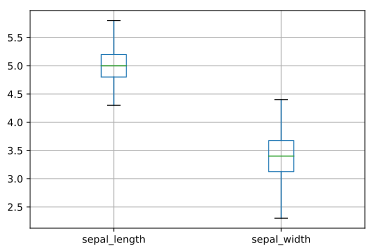

In [163]:
# And I can plot
ax = groupby_name.get_group('setosa').boxplot(column=["sepal_length","sepal_width"], return_type='axes')

# Plotting data

- The plot method on Series and DatFrame is just a wrapper on matplotlib plt.plot()
- Many available plots:
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or 'density' for density plots • ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots • ‘pie’ for pie plots
    
- There are several more complex plotting functions in pandas.tools.plotting that take a Series or DataFrame as an argument. These include:
    - Scatter matrices
    - Andrews Curves
    - Autocorrelation
    - Bootstrap Plot

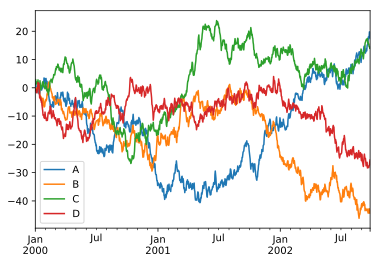

In [164]:
## Quick example
df = pd.DataFrame(np.random.randn(1000, 4), index =pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.plot()

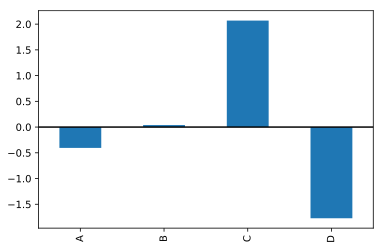

In [165]:
plt.figure()
df.iloc[5].plot(kind = 'bar')
plt.axhline(0, color = 'k')

## Lets open the supplement lecture and do things interactively

## Attribution

This notebook draws on the Jupyter Notebook lecture from the open
source [Scipy Lecture Notes][scipy-lec-notes] by Gaël Varoquaux and Joris Van den Bossche's [Pandas tutorial][pandas-tutorial].

[scipy-lec-notes]: http://www.scipy-lectures.org/
[pandas-tutorial]: https://github.com/jorisvandenbossche/pandas-tutorial

## Resources

* "Official" book by author of Pandas: [Python for Data
Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [SciPy Lecture Notes: Statistics](http://www.scipy-
lectures.org/packages/statistics/index.html)
* [Tom Augspurger's series on modern idiomatic pandas][tom]

* Lots of tutorials on the internet, eg http://github.com/jvns/pandas-cookbook, https://github.com/brandon-rhodes/pycon-pandas-tutorial/

[tom]:https://tomaugspurger.github.io/modern-1.html


### There is another notebook associated with this lecture on the [website][lec6-nb].

#### There are also updated [exercises][wb].
[lec6-nb]: https://stanford.edu/~bmj/lectures.html
[wb]: https://stanford.edu/~bmj/ex/exercises.pdf